In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [3]:
E = pd.read_csv('task1-1E.csv')
E['支付时间'] = pd.to_datetime(E['支付时间'], errors = 'coerce', format = '%Y/%m/%d %H:%M')
E['Year'] = E.支付时间.dt.year
E['Month'] = E.支付时间.dt.month
E['Day'] = E.支付时间.dt.day
E['Hrs'] = E.支付时间.dt.hour
E['Min'] = E.支付时间.dt.minute
E.sample(10)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,大类,二级类,Year,Month,Day,Hrs,Min
8028,DD201708167493569671399600476,E43A6E078A07631,5.5,5.5,103g康师傅红烧牛肉面,2017-11-13 19:26:00,D,已出货未退款,已提现,非饮料,方便速食,2017,11,13,19,26
5140,DD2017080515415439F207DDC8C65,E43A6E078A07631,4.0,4.0,脉动,2017-10-28 21:09:00,D,已出货未退款,已提现,饮料,功能饮料,2017,10,28,21,9
5503,DD201708152227292746384D81D4F,E43A6E078A07631,3.0,3.0,果粒橙,2017-08-21 15:23:00,D,已出货未退款,已提现,饮料,果蔬饮料,2017,8,21,15,23
8107,DD2017081674930399738115776012,E43A6E078A07631,1.6,1.6,20g马来西亚风味咪咪蟹味粒0219,2017-04-23 18:49:00,D,已出货未退款,已提现,非饮料,膨化食品,2017,4,23,18,49
405,DD20170612024211699C1B6591E0D,E43A6E078A07631,4.0,4.0,营养快线,2017-08-18 15:07:00,D,已出货未退款,已提现,饮料,乳制品,2017,8,18,15,7
6795,DD201708167493431717266294981,E43A6E078A07631,0.6,0.6,10g卫龙亲嘴烧香辣味,2017-07-25 17:02:00,D,已出货未退款,已提现,非饮料,肉干/豆制品/蛋,2017,7,25,17,2
6141,DD201708167493799106009353873,E43A6E078A07631,2.4,2.4,20g咪咪虾条马来西亚风味,2017-12-05 14:00:00,D,已出货未退款,已提现,非饮料,膨化食品,2017,12,5,14,0
2342,DD20170715024039282A8C8703B0C,E43A6E078A07631,6.0,6.0,红牛,2017-11-08 14:43:00,D,已出货未退款,已提现,饮料,功能饮料,2017,11,8,14,43
1554,DD201707302312158840F4EAEEFF8,E43A6E078A07631,3.5,3.5,东鹏特饮,2017-07-22 12:10:00,D,已出货未退款,已提现,饮料,功能饮料,2017,7,22,12,10
4341,DD20170730174143619A696F39B6F,E43A6E078A07631,2.0,2.0,怡宝纯净水,2017-07-24 17:12:00,D,已出货未退款,已提现,饮料,水,2017,7,24,17,12


In [12]:
path = '3.2Edata.csv'
E.to_csv(path, index = False)

In [5]:
filter_data = E[E.大类 == '饮料' ]
beverage_counts = filter_data['二级类'].value_counts()

In [6]:
font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = FontProperties(fname=font_path)

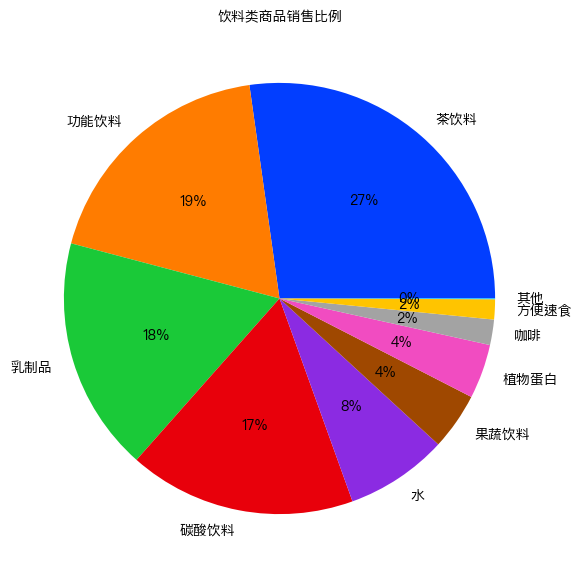

In [7]:
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(10, 7))
plt.pie(beverage_counts, labels=beverage_counts.index, colors=colors, autopct='%.0f%%', textprops={'fontproperties': font_prop})
plt.title('饮料类商品销售比例', fontproperties=font_prop)
plt.show()

In [8]:
num = filter_data.groupby(['商品']).agg({'订单号': 'count', '二级类': 'first'}).reset_index()
num = num.rename(columns={'订单号': '订单数量'})
num_sorted = num.sort_values(by='订单数量', ascending=False)

In [9]:
num_sorted.describe()

,订单数量
count,105.000000
mean,52.495238
std,87.096777
min,1.000000
25%,3.000000
50%,15.000000
75%,64.000000
max,411.000000


In [10]:
def label_beverage_sales(row):
    if row['订单数量'] >= 64:
        return '畅销'
    elif row['订单数量'] >= 15:
        return '正常'
    else:
        return '滞销'
num_sorted['标签'] = num_sorted.apply(label_beverage_sales, axis=1)

In [11]:
path = '3-1E.csv'
num_sorted.to_csv(path, index = False)